🌳 1. Decision Tree Classifier (Iris Dataset)

In [6]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Load data Iris
iris = load_iris()
X = iris.data[:, 2:]  # hanya petal length dan petal width
y = iris.target

# Buat dan latih model Decision Tree
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=42)

🎨 2. Visualisasi Decision Tree

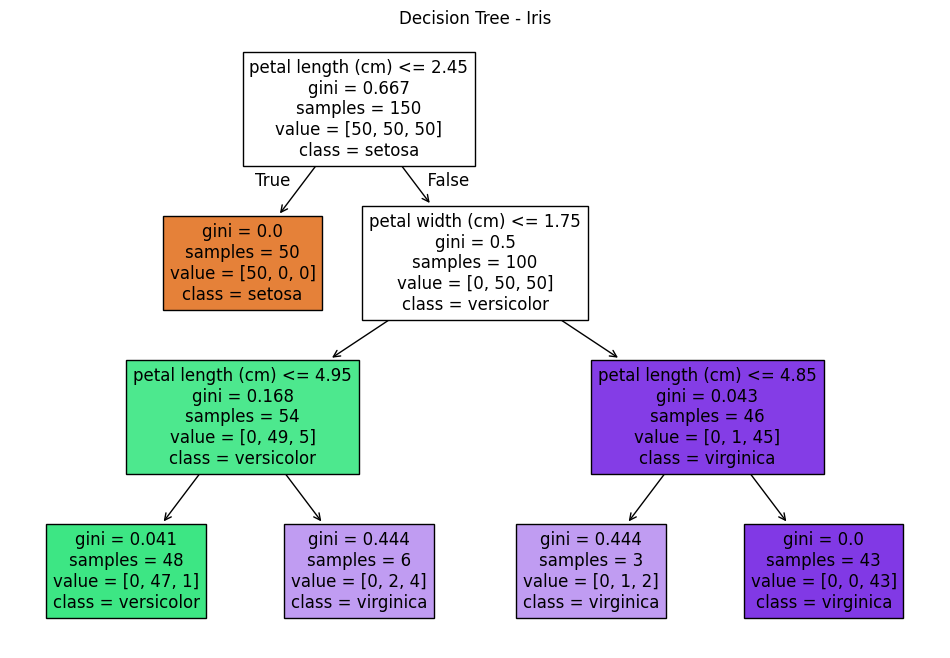

In [7]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(tree_clf,
          feature_names=iris.feature_names[2:],
          class_names=iris.target_names,
          filled=True)
plt.title("Decision Tree - Iris")
plt.show()

📑 3. Ekspor sebagai teks

In [8]:
from sklearn.tree import export_text

tree_rules = export_text(tree_clf,
                         feature_names=iris.feature_names[2:])
print(tree_rules)

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



📈 4. Decision Tree untuk Regresi

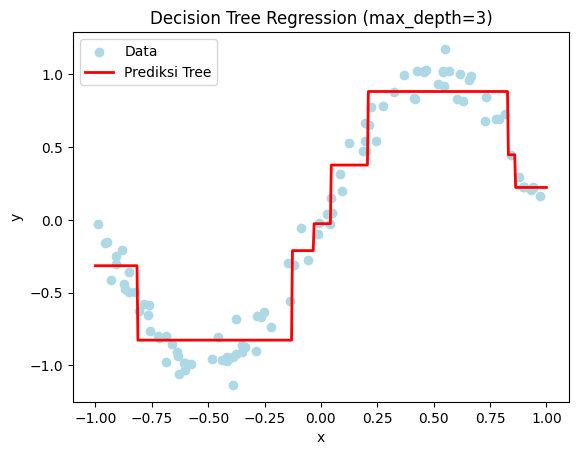

In [9]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

# Dataset: y = sin(x) + noise
np.random.seed(42)
X = np.sort(np.random.rand(100, 1) * 2 - 1, axis=0)
y = np.sin(np.pi * X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# Latih DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=3)
tree_reg.fit(X, y)

# Prediksi
X_test = np.linspace(-1, 1, 500).reshape(-1, 1)
y_pred = tree_reg.predict(X_test)

# Plot hasil
plt.scatter(X, y, c="lightblue", label="Data")
plt.plot(X_test, y_pred, "r-", linewidth=2, label="Prediksi Tree")
plt.title("Decision Tree Regression (max_depth=3)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

🛠️ 5. Efek Overfitting (tanpa batas depth)

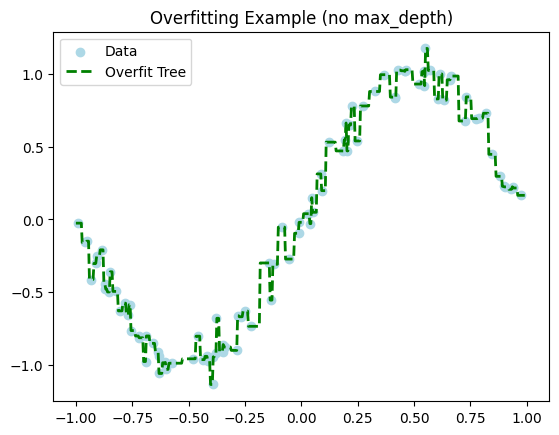

In [10]:
# Tanpa regularisasi
overfit_tree = DecisionTreeRegressor()
overfit_tree.fit(X, y)

y_overfit = overfit_tree.predict(X_test)

# Plot
plt.scatter(X, y, c="lightblue", label="Data")
plt.plot(X_test, y_overfit, "g--", linewidth=2, label="Overfit Tree")
plt.title("Overfitting Example (no max_depth)")
plt.legend()
plt.show()

### ✅ Penjelasan:

* `DecisionTreeClassifier` cocok untuk data kategori seperti **Iris**.
* Dengan `max_depth`, kamu bisa menghindari overfitting.
* Untuk regresi, `DecisionTreeRegressor` menyesuaikan **nilai rata-rata** dalam setiap leaf.
* Tanpa batasan (seperti `max_depth`, `min_samples_leaf`, dll), model bisa overfit parah ke noise.